## DATA COLLECTION

In [419]:
with open('SMSSpamCollection.txt','r') as f:
    email_ls = f.read()

In [420]:
email_ls = email_ls.split('\n')

In [421]:
x = []
y = []
for i in email_ls:
    j = i.split('\t')
    if len(j)==2:
        y.append(j[0])
        x.append(j[1])

## TEXT CLEANING

In [422]:
for i in range(len(x)):
    x[i] = re.sub('[^a-zA-z ]','',x[i]).lower()

In [423]:
import pandas as pd
dt = {"email_message":x,"label":y}
df = pd.DataFrame(dt)
df

,email_message,label
0,go until jurong point crazy available only in ...,ham
1,ok lar joking wif u oni,ham
2,free entry in a wkly comp to win fa cup final...,spam
3,u dun say so early hor u c already then say,ham
4,nah i dont think he goes to usf he lives aroun...,ham
...,...,...
5569,this is the nd time we have tried contact u u...,spam
5570,will b going to esplanade fr home,ham
5571,pity was in mood for that soany other suggest...,ham
5572,the guy did some bitching but i acted like id ...,ham


In [424]:
df.value_counts('label')

label
ham     4827
spam     747
dtype: int64

In [425]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [426]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [427]:
# To decrease the no. of datapoints from ham
# ham.sample(1000)

In [428]:
ham = ham.sample(1000)

In [429]:
balanced_df = pd.concat([ham,spam])

In [430]:
balanced_df.value_counts('label')

label
ham     1000
spam     747
dtype: int64

In [431]:
x = balanced_df['email_message']
y = balanced_df['label']

In [432]:
x = x.values

In [433]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [434]:
bow = CountVectorizer(max_features=1700 , stop_words='english') # BOW - Bag of Words

In [435]:
x = bow.fit_transform(x).toarray()

In [436]:
x.shape

(1747, 1700)

In [437]:
column_name = bow.get_feature_names_out()

In [438]:
testing = pd.DataFrame(x,columns = column_name)

In [439]:
testing

,able,abt,abta,ac,access,account,action,activate,actually,added,...,yest,yesterday,yo,youd,youre,youve,yr,yrs,yup,zed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [440]:
y = y.map({'ham':0 , 'spam' : 1})

In [441]:
import numpy as np

In [442]:
y = np.array(y)

In [443]:
from sklearn.model_selection import train_test_split

In [444]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.15)

In [445]:
from sklearn.naive_bayes import MultinomialNB , BernoulliNB

In [446]:
mb = MultinomialNB()
bnb = BernoulliNB()

In [447]:
mb.fit(x_train , y_train)

MultinomialNB()

In [448]:
bnb.fit(x_train , y_train)

BernoulliNB()

In [449]:
print("For Multinomial Naive Bayes")
print('Training Score:',round(mb.score(x_train , y_train),4)*100,'%')
print('Training Score:',round(mb.score(x_test , y_test),4)*100,'%\n')
print("For BernoulliNB Naive Bayes")
print('Training Score:',round(bnb.score(x_train , y_train),4)*100,'%')
print('Training Score:',round(bnb.score(x_test , y_test),4)*100,'%')

For Multinomial Naive Bayes
Training Score: 97.04 %
Training Score: 94.3 %

For BernoulliNB Naive Bayes
Training Score: 95.62 %
Training Score: 95.06 %


In [450]:
# Logistic Regression 
# Decision Tree Classifier
# Random Forest Classifier

In [453]:
import joblib

In [455]:
joblib.dump(bnb,'BNB_Model.lb')
joblib.dump(bow,'countvectorizer.lb')

['countvectorizer.lb']

In [456]:
prediction = bnb.predict(x_test)

In [461]:
from sklearn.metrics import confusion_matrix

In [464]:
cf = confusion_matrix(y_test, prediction)
cf

array([[159,   0],
       [ 13,  91]], dtype=int64)

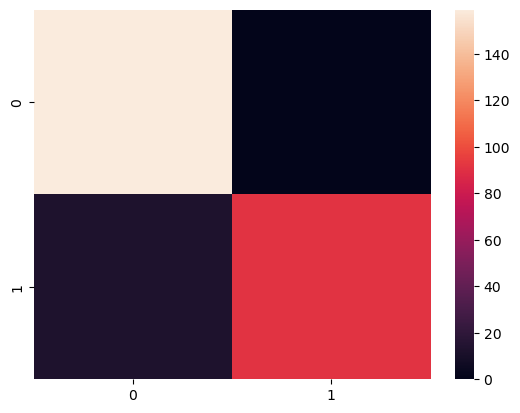

In [467]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf)
plt.show()